# Notebook used to analyze what happens to premiums if countries are pooled and use IBRD-Pricing

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import prem_ibrd as prib

file_path=Path("/Users/kbergmueller/Library/CloudStorage/OneDrive-ETHZurich/Thesis")

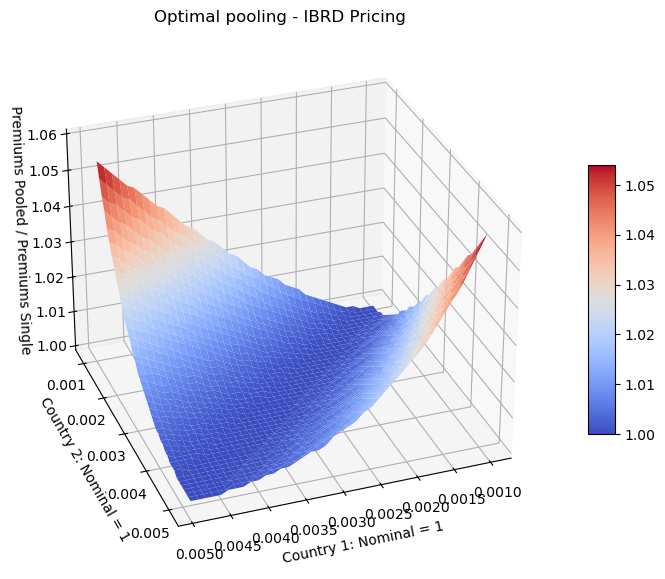

1.0 0.004500000000000001 0.005
1.057 0.001 0.005


In [12]:

params_ibrd = prib.init_prem_ibrd(want_plot=False, file_path=file_path)
a, k, b = params_ibrd

x_1 = np.arange(0.001, 0.005, 0.0001)
x_2 = np.arange(0.005, 0.0009999, -0.0001)
n_1 = 1
n_2 = 1

# Create meshgrid for x_1 and x_2
X1, X2 = np.meshgrid(x_1, x_2)
F = np.zeros(X1.shape)

# Calculate values of f for each pair of x_1 and x_2
for i in range(len(x_1)):
    for j in range(len(x_2)):
        n_3 = n_1 + n_2
        x_3 = (X1[j, i] * n_1 + X2[j, i] * n_2) / n_3
        xn_1 = float(prib.monoExp(X1[j, i]*100, a, k, b)) * X1[j, i] * n_1
        xn_2 = float(prib.monoExp(X2[j, i]*100, a, k, b)) * X2[j, i] * n_2
        xn_sng = xn_1 + xn_2
        xn_3 = round(float(prib.monoExp(x_3*100, a, k, b)), 7) * x_3 * n_3
        cur = xn_3 / xn_sng 
        F[j, i] = round(xn_3 / xn_sng, 3)

        #if cur <= 1.5:
        #    F[j, i] = round(cur,10)
        #else: 
        #    F[j, i] = round(cur,10)

F_good = np.where(F <= 1, F, np.nan)  # Good values
F_bad = np.where(F > 1, F, np.nan)    # Bad values

# Plotting the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Use a color map that emphasizes the minima
#surf = ax.plot_surface(X1, X2, F, cmap='coolwarm', edgecolor='none')
surf = ax.plot_surface(X1, X2, F, cmap='coolwarm', edgecolor='none')
#surf2 = ax.plot_surface(X1, X2, F_bad, color='tab:green', edgecolor='none')

# Add contour lines to better highlight areas with low values
ax.contourf(X1, X2, F, zdir='z', offset=-100, cmap='coolwarm')
ax.contourf(X1, X2, F, zdir='x', offset=-40, cmap='coolwarm')
ax.contourf(X1, X2, F, zdir='y', offset=40, cmap='coolwarm')

# Zoom in on the z-axis to focus on minimal values
#ax.set_zlim(np.min(F), np.percentile(F, 99))  # Use the 95th percentile to avoid extreme values

# Adjust the viewing angle to better see the minima
ax.view_init(elev=30, azim=70)

# Add color bar for reference
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

ax.set_xlabel(f'Country 1: Nominal = {n_1}')
ax.set_ylabel(f'Country 2: Nominal = {n_2}')
ax.set_zlabel('Premiums Pooled / Premiums Single')
ax.set_title('Optimal pooling - IBRD Pricing')

plt.show()

# Find the minimum of F and its corresponding (x1, x2) values
min_F = np.nanmin(F)
min_F_index = np.unravel_index(np.nanargmin(F), F.shape)
min_x1 = X1[min_F_index]
min_x2 = X2[min_F_index]

print(min_F, min_x1, min_x2)

max_F = np.nanmax(F)
max_F_index = np.unravel_index(np.nanargmax(F), F.shape)
max_x1 = X1[max_F_index]
max_x2 = X2[max_F_index]

print(max_F, max_x1, max_x2)

